In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Yelp_Census Data File and store into Pandas Data Frames
yelp_census_data = pd.read_csv("yelp_census_data.csv")

In [3]:
yelp_census_data.head()

,Unnamed: 0,Median Age,Population,White,Black,Asian,Hispanic,Poverty Count,Household Income,Per Capita Income,Zip Code,Review Count,Price,Average Rating
0,0,28.0,57942,20811,5153,97,52223,18902,34323,11294,90001,3056,NaN,3.917866
1,1,27.5,51826,19573,11188,311,39527,18302,32520,11212,90002,4943,NaN,4.124924
2,2,28.0,70208,18114,16206,180,53630,24556,31878,10611,90003,6564,NaN,4.249543
3,3,35.5,63095,25611,2405,15870,31965,12919,43180,29194,90004,12633,NaN,4.260548
4,4,33.9,39338,7471,2213,13289,20199,11520,31485,20265,90005,13671,NaN,4.324738


In [4]:
#Create updated dataframe with select columns

yelp_census2 = yelp_census_data[["Zip Code", "Median Age", "Population", "Review Count", "Average Rating"]]
yelp_census2.head()

,Zip Code,Median Age,Population,Review Count,Average Rating
0,90001,28.0,57942,3056,3.917866
1,90002,27.5,51826,4943,4.124924
2,90003,28.0,70208,6564,4.249543
3,90004,35.5,63095,12633,4.260548
4,90005,33.9,39338,13671,4.324738


In [5]:
# Establish the bins 
age_bins = [0,20,25,35,45,55,65,200]
group_names = ["<20", "20-24", "25-34", "35-44", "45-54", "55-64", "65+"]

# Categorize the existing players using the age bins
yelp_age = yelp_census2.copy()
yelp_age["Median Age Groups"] = pd.cut(yelp_age["Median Age"], age_bins, labels=group_names)

#Create columns for new DataFrame
yelp_age_2 = yelp_age.groupby(["Median Age Groups"])
#zip_code = yelp_age_2["Zip Code"]
median_age = yelp_age_2["Median Age"].mean()
population = yelp_age_2["Population"].sum()
review_count = yelp_age_2["Review Count"].sum()
avg_rating = yelp_age_2["Average Rating"].mean()
rvw_per_pop = review_count/population

age_bin_df = pd.DataFrame({ #"Zip Code": zip_code,
                            "Median Age": median_age,
                            "Population": population,
                            "Review Count": review_count,
                            "Average Rating": avg_rating,
                            "Review Count Rate": rvw_per_pop})

age_bin_df.style.format({"Review Count Rate": "%{:.2f}"})

age_bin_df

,Average Rating,Median Age,Population,Review Count,Review Count Rate
Median Age Groups,,,,,
<20,4.105676,17.880000,17474,15152,0.867117
20-24,4.051379,23.104348,371336,137332,0.369832
25-34,4.195753,31.520040,17171318,2901083,0.168949
35-44,4.172399,39.690842,18300978,5114262,0.279453
45-54,4.134822,49.493667,2364198,1383684,0.585266
55-64,4.151968,59.146154,230194,305363,1.326546
65+,4.198440,68.890000,63766,73373,1.150660


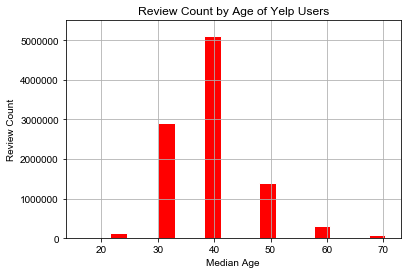

In [6]:
#Bar Plot Depicting Review Count by Age of Yelp Users

plt.bar(age_bin_df["Median Age"],
        age_bin_df["Review Count"], 
        edgecolor="white", width = 3, color= "red")
            

# Incorporate the other graph properties
plt.title("Review Count by Age of Yelp Users")
plt.ylabel("Review Count")
plt.xlabel("Median Age")
plt.ylim((10000,5500000))
plt.grid(True)
sns.set()

plt.show()


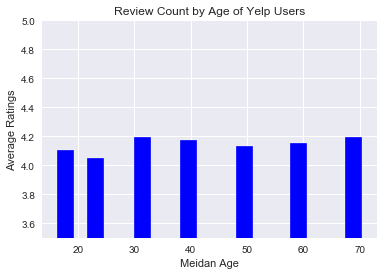

In [7]:
#Bar Plot Depicting Ratings by Age of Yelp Users

plt.bar(age_bin_df["Median Age"],
        age_bin_df["Average Rating"], 
        edgecolor="white", width = 3, color= 'blue')
            #alpha=0.6, label="Rating")

#Data Labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(height,
                ha='right', va='top', color='black', fontsize=14)

# Incorporate the other graph properties
plt.title("Review Count by Age of Yelp Users")
plt.ylabel("Average Ratings")
plt.xlabel("Meidan Age")
plt.ylim((3.5,5))
plt.grid(True)
sns.set()

plt.show()

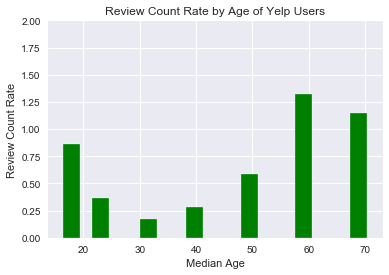

In [8]:
#Bar Plot Depicting Review Count by Age of Yelp Users

plt.bar(age_bin_df["Median Age"],
        age_bin_df["Review Count Rate"], 
        edgecolor="white", width = 3, color='green')

# Incorporate the other graph properties
plt.title("Review Count Rate by Age of Yelp Users")
plt.ylabel("Review Count Rate")
plt.xlabel("Median Age")
plt.ylim((0,2))
plt.grid(True)
sns.set()

plt.show()

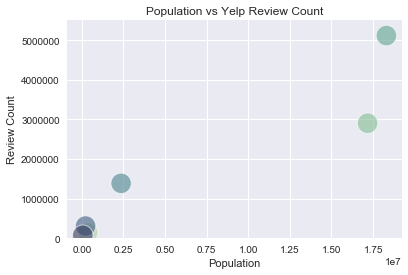

In [12]:
# All-in Bubble Plot of Population vs Review Count with 'Average Rating' as Bubble size
plt.scatter(age_bin_df["Population"],
            age_bin_df["Review Count"],
            s=age_bin_df["Average Rating"]*100, c=sns.cubehelix_palette(8, start=.5, rot=-.75), 
            edgecolor="white", linewidths=1, marker="o", 
            alpha=0.6, label="Rating")

# Incorporate the other graph properties
plt.title("Population vs Yelp Review Count")
plt.ylabel("Review Count")
plt.xlabel("Population")
plt.ylim((10000,5500000))
plt.grid(True)
sns.set()

plt.show()

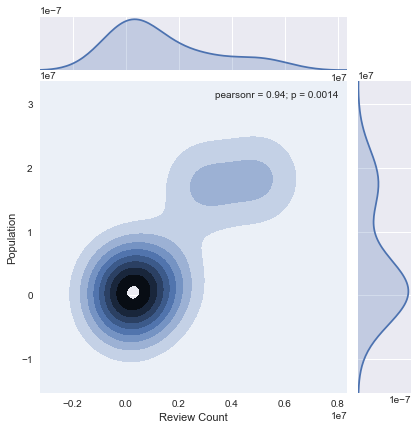

In [13]:
# Density Estimation Plot of Popluation vs Household income
hexplot = sns.jointplot(x=age_bin_df["Review Count"], y=age_bin_df["Population"], data=age_bin_df, kind="kde");

plt.show()